In [97]:

pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Collecting scikit-learn
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.9 MB 6.3 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/10.9 MB 12.6 MB/s eta 0:00:01
   ------- -------------------------------- 2.0/10.9 MB 14.0 MB/s eta 0:00:01
   ------- -------------------------------- 2.0/10.9 MB 14.0 MB/s eta 0:00:01
   ------------ --------------------------- 3.5/10.9 MB 14.7 MB/s eta 0:00:01
   ---------------- ----------------------- 4.6/10.9 MB 16.3 MB/s eta 0:00:01
   -------------------- ------------------- 5.7/10.9 MB 17.2 MB/s eta 0:00:01
   ------------------------ --------------- 6.7/10.9 MB 17.9 MB/s eta 0


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [98]:
#Import necessary Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
#load data set

df = pd.read_csv('Employee.csv')
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [28]:
#shape of the data set
print("Shape :",df.shape)

Shape : (148, 6)


In [30]:
#get basic informations like column names,non null values count, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [31]:
#descriptive statistics of numeric variables only
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


Age: Most employees are between 22 and 37 years old, with a few younger or older individuals.
Salary: The salary range is wide, with a median of 5000 units, but significant variation in salaries.
Gender: A majority of the entries are coded as 0, with a smaller proportion coded as 1.

In [32]:
#descriptive statistics of Categorical variables only
df.describe(include=object)

,Company,Place,Country
count,140,134,148
unique,6,11,1
top,TCS,Mumbai,India
freq,53,37,148


In [33]:

#The unique() function removes all duplicate values on a column and returns a single value for multiple same values
print("Unique values in company \n", df['Company'].unique())
print("Unique values in age \n", df['Age'].unique())
print("unique values in Salary \n",df['Salary'].unique())
print("unique values in Place \n",df['Place'].unique())
print("unique values in Country \n",df['Country'].unique())
print("unique values in Gender \n",df['Gender'].unique())

Unique values in company 
 ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Unique values in age 
 [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
unique values in Salary 
 [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
unique values in Place 
 ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
unique values in Country 
 ['India']
unique values in Gender 
 [0 1]


In [34]:
unique_values= {feature:df[feature].unique() for feature in df.columns}
#print("list down the unique values in each feature :\n", unique_values)
lengths = {feature: len(values) for feature, values in unique_values.items()}
print(lengths)
print(" number of unique values in column 'Company' : ", df['Company'].nunique(dropna=False))
 # Get number of unique values in column 'Company'

{'Company': 7, 'Age': 30, 'Salary': 41, 'Place': 12, 'Country': 1, 'Gender': 2}
 number of unique values in column 'Company' :  7


In [35]:
# renaming of the columns

df_renamed=df.rename(columns={
    'Company' : 'company_name',
    'Age' :'employee_age',
    'Salary':'employee_salary',
    'Place':'city',
    'Country':'Nation',
    'Gender':'gender_code'
    
})

print(df_renamed)

    company_name  employee_age  employee_salary      city Nation  gender_code
0            TCS          20.0              NaN   Chennai  India            0
1        Infosys          30.0              NaN    Mumbai  India            0
2            TCS          35.0           2300.0  Calcutta  India            0
3        Infosys          40.0           3000.0     Delhi  India            0
4            TCS          23.0           4000.0    Mumbai  India            0
..           ...           ...              ...       ...    ...          ...
143          TCS          33.0           9024.0  Calcutta  India            1
144      Infosys          22.0           8787.0  Calcutta  India            1
145      Infosys          44.0           4034.0     Delhi  India            1
146          TCS          33.0           5034.0    Mumbai  India            1
147      Infosys          22.0           8202.0    Cochin  India            0

[148 rows x 6 columns]


## Data Cleaning:
Find the missing and inappropriate values, treat them appropriately.
Remove all duplicate rows.
Find the outliers.
Replace the value 0 in age as NaN
Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

In [36]:
#Replace the value 0 in age as NaN
df['Age'].replace(0,np.nan,inplace=True)
df.describe()

C:\Users\hp\AppData\Local\Temp\ipykernel_20392\1002437172.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].replace(0,np.nan,inplace=True)


,Age,Salary,Gender
count,124.000000,124.000000,148.000000
mean,31.959677,5312.467742,0.222973
std,9.034171,2573.764683,0.417654
min,17.000000,1089.000000,0.000000
25%,23.000000,3030.000000,0.000000
50%,33.000000,5000.000000,0.000000
75%,40.000000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [37]:
#Find the missing and inappropriate values, treat them appropriately.
#Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)


# Check for missing values in each column
print("Missing values in each columns")
print(df.isnull().sum())


Missing values in each columns
Company     8
Age        24
Salary     24
Place      14
Country     0
Gender      0
dtype: int64


In [41]:
#For numerical columns age and salary, use mean/meadian to fill missing values
#Replace missing values with meadian, which is often a robust measure for numerical data

df['Salary'].fillna(df['Salary'].median(), inplace=True)  # If True, fill in-place. Note: this will modify any other views on this object 

#Fill missing values in Age
df['Age'].fillna(df['Age'].median(),inplace=True)

#For categorical columns(place,country,Company),Use Mode(mose frequent values)to fill missing values
df['Company'].fillna(df['Company'].mode()[0],inplace=True)
df['Place'].fillna(df['Place'].mode()[0],inplace=True)
# Check for missing values in each column
print("Missing values in each columns after replacement of NAN with median/Mode")
print(df.isnull().sum())

Missing values in each columns after replacement of NAN with median/Mode
Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_20392\2008530618.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(df['Salary'].median(), inplace=True)  # If True, fill in-place. Note: this will modify any other views on this object
C:\Users\hp\AppData\Local\Temp\ipykernel_20392\2008530618.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the in

In [42]:
#Remove all duplicate rows.
df.drop_duplicates(inplace=True)

Text(0.5, 1.0, 'Boxplot of Salary')

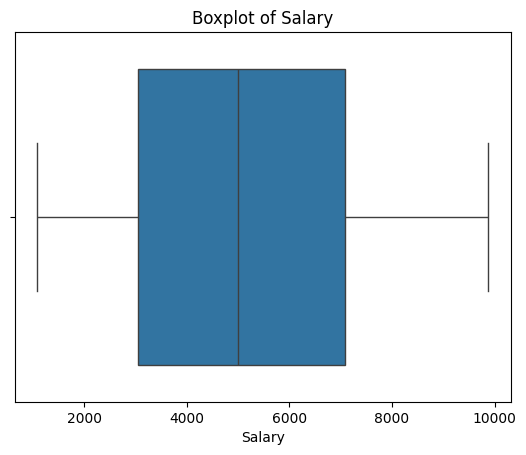

In [65]:
#Find the outliers.

#To find outliers, we can use statistical methods such as the IQR (Interquartile Range) 
# for numerical columns. Here, we will apply it to the 'Age' and 'Salary' columns.

sns.boxplot(x='Salary',data =df)
plt.title('Boxplot of Salary')

Text(0.5, 1.0, 'Boxplot of Age')

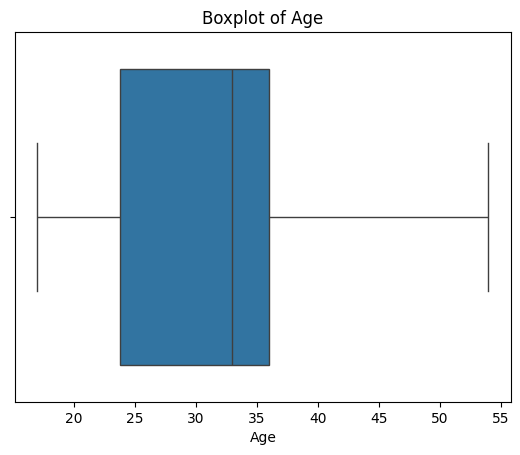

In [64]:
sns.boxplot(x='Age',data =df)
plt.title('Boxplot of Age')

In [66]:

#find outliers using IQR

def detect_outliers_iqr(column):
    Q1  = column.quantile(0.25)
    Q2  = column.quantile(0.75)
    IQR = Q2-Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q2+(1.5*IQR)
    return (column > upper_bound) | (column < lower_bound)

salary_outliers = detect_outliers_iqr(df['Salary'])
age_outliers = detect_outliers_iqr(df['Age'])
print("Number of outliers in Salary:", salary_outliers.sum())
print("Number of outliers in Age:", age_outliers.sum())





Number of outliers in Salary: 0
Number of outliers in Age: 0


## Data Analysis: 
Filter the data with age >40 and salary<5000
Plot the chart with age and salary
Count the number of people from each place and represent it visually

In [75]:
#Filter the data with age >40 and salary<5000

filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]

print("Filtered data frame - age >40 and salary<500 \n", filtered_df)


Filtered data frame - age >40 and salary<500 
      Company   Age  Salary      Place Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


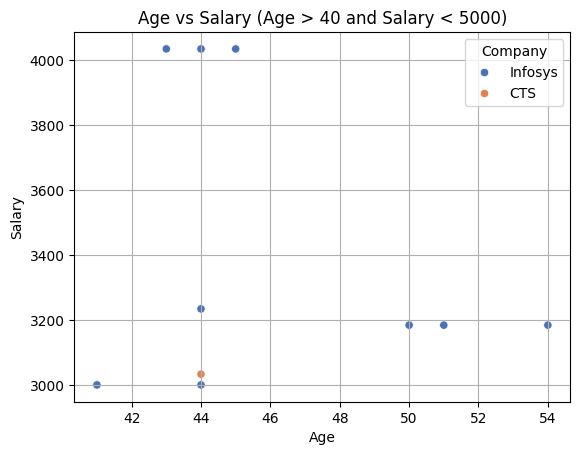

In [77]:
#Plot the chart with age and salary

sns.scatterplot(data=filtered_df,x='Age',y='Salary',hue="Company",palette='deep')
plt.title("Age vs Salary (Age > 40 and Salary < 5000)")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

The number of people from each place : 
 Place
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64


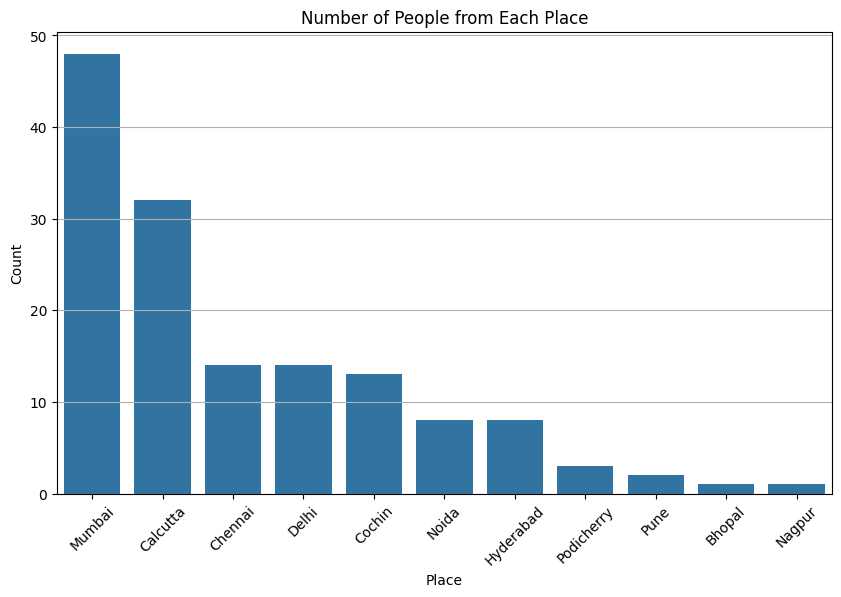

In [85]:
#Count the number of people from each place and represent it visually

place_counts = df['Place'].value_counts()
print("The number of people from each place : \n", place_counts)

plt.figure(figsize=(10,6))
sns.barplot(x=place_counts.index,y=place_counts.values)
plt.xlabel("Place")
plt.ylabel("Count")
plt.title("Number of People from Each Place")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Data Encoding: 
Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

In [92]:
# To convert categorical variables into numerical representations, you can use various encoding techniques 
# such as one-hot encoding and label encoding. These methods are essential for preparing data for machine learning algorithms 
# that require numerical input.

# One-Hot Encoding
#One-hot encoding creates binary columns for each category, indicating the presence or absence of the category.
#  This method is suitable for nominal categorical variables where there is no intrinsic ordering.

## Apply One-Hot Encoding to 'Company', 'Place', and 'Country'
df_encoded = pd.get_dummies(df,columns=['Company','Place','Country'])
print("Data after One-Hot Encoding:")
print(df_encoded)


Data after One-Hot Encoding:
      Age  Salary  Gender  Company_CTS  Company_Congnizant  Company_Infosys  \
0    20.0  5000.0       0        False               False            False   
1    30.0  5000.0       0        False               False             True   
2    35.0  2300.0       0        False               False            False   
3    40.0  3000.0       0        False               False             True   
4    23.0  4000.0       0        False               False            False   
..    ...     ...     ...          ...                 ...              ...   
142  22.0  8202.0       0        False               False            False   
143  33.0  9024.0       1        False               False            False   
145  44.0  4034.0       1        False               False             True   
146  33.0  5034.0       1        False               False            False   
147  22.0  8202.0       0        False               False             True   

     Company_Infosys P

## Feature Scaling: 
After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

In [105]:
#Feature scaling is an essential preprocessing step in machine learning to ensure that all features contribute 
# equally to the model's performance. Scaling transforms features to have a specific range or distribution, 
# which can improve the convergence of gradient descent algorithms and the performance of distance-based models.

# StandardScaler standardizes features by removing the mean and scaling to unit variance. 
# It transforms the data so that it has a mean of 0 and a standard deviation of 1.



#initialize standard scaler
standard_scaler = StandardScaler()
standard_scaler.fit(df_encoded)
#transform the data
scaled_data = standard_scaler.transform(df_encoded)

# Print the scaled data
print("Data after Standard Scaling:")
print(scaled_data)


Data after Standard Scaling:
[[-1.48467637 -0.10082748 -0.53452248 ... -0.14586499 -0.11867817
   0.        ]
 [-0.26717411 -0.10082748 -0.53452248 ... -0.14586499 -0.11867817
   0.        ]
 [ 0.34157702 -1.2437349  -0.53452248 ... -0.14586499 -0.11867817
   0.        ]
 ...
 [ 1.43732906 -0.50973436  1.87082869 ... -0.14586499 -0.11867817
   0.        ]
 [ 0.09807657 -0.08643531  1.87082869 ... -0.14586499 -0.11867817
   0.        ]
 [-1.24117592  1.25457606 -0.53452248 ... -0.14586499 -0.11867817
   0.        ]]


In [109]:
# MinMaxScaler scales features to a given range, typically [0, 1]. 
# It transforms the data by scaling each feature to a specific range based on the minimum and maximum values.

minmax_scaler = MinMaxScaler()
#Fit the scaler on the data
minmax_scaler.fit(df_encoded)
#Transform the data
scaled_data = minmax_scaler.transform(df_encoded)
print(scaled_data)

[[0.08108108 0.44508934 0.         ... 0.         0.         0.        ]
 [0.35135135 0.44508934 0.         ... 0.         0.         0.        ]
 [0.48648649 0.13781723 0.         ... 0.         0.         0.        ]
 ...
 [0.72972973 0.33515421 1.         ... 0.         0.         0.        ]
 [0.43243243 0.44895869 1.         ... 0.         0.         0.        ]
 [0.13513514 0.80949129 0.         ... 0.         0.         0.        ]]
